# Regression with neural networks

### California housing prices (as in the udemy exercise)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data=pd.read_csv('california_housing_sklearn.csv')

In [3]:
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


*No blank values :)*
*All floats*

In [5]:
raw_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Let's check the distributions of the variables

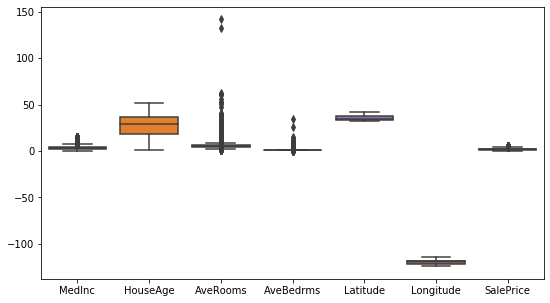

In [6]:
plt.figure(figsize=(9,5))
#sns.violinplot(raw_data.drop(['Population']))
dd=raw_data.drop(['Population', 'AveOccup'], axis=1)
sns.boxplot(data=dd)

#dd=raw_data.drop('Population', axis=1)

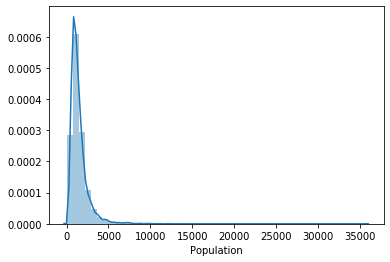

In [7]:
sns.distplot(raw_data['Population'])

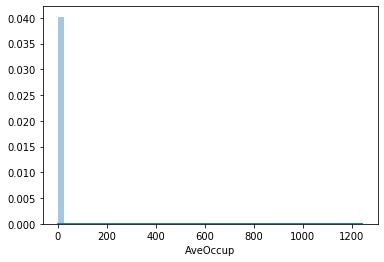

In [8]:
sns.distplot(raw_data['AveOccup'])

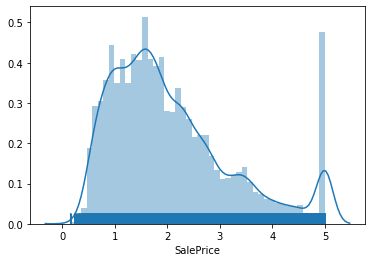

In [9]:
sns.distplot(raw_data['SalePrice'], rug=True)

<Figure size 648x648 with 0 Axes>

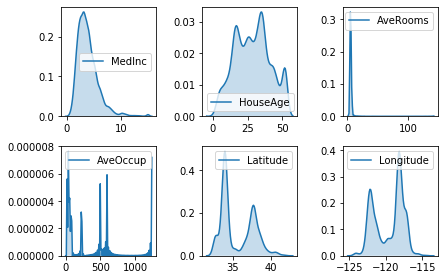

In [10]:
fig=plt.figure(figsize=(9,9))
fig, ((ax1,ax2, ax3), (ax4,ax5,ax6) ) = plt.subplots(2,3)
fig.tight_layout(pad=0.9)
sns.kdeplot(raw_data['MedInc'], shade=True, ax=ax1)
sns.kdeplot(raw_data['HouseAge'], shade=True, ax=ax2)
sns.kdeplot(raw_data['AveRooms'], shade=True, ax=ax3)
sns.kdeplot(raw_data['AveOccup'], shade=True, ax=ax4)
sns.kdeplot(raw_data['Latitude'], shade=True, ax=ax5)
sns.kdeplot(raw_data['Longitude'], shade=True, ax=ax6)



Population and average occupation have very skewed distributions

In [11]:
#sns.countplot(raw_data[raw_data['AveBedrms']<=20]['AveBedrms'])

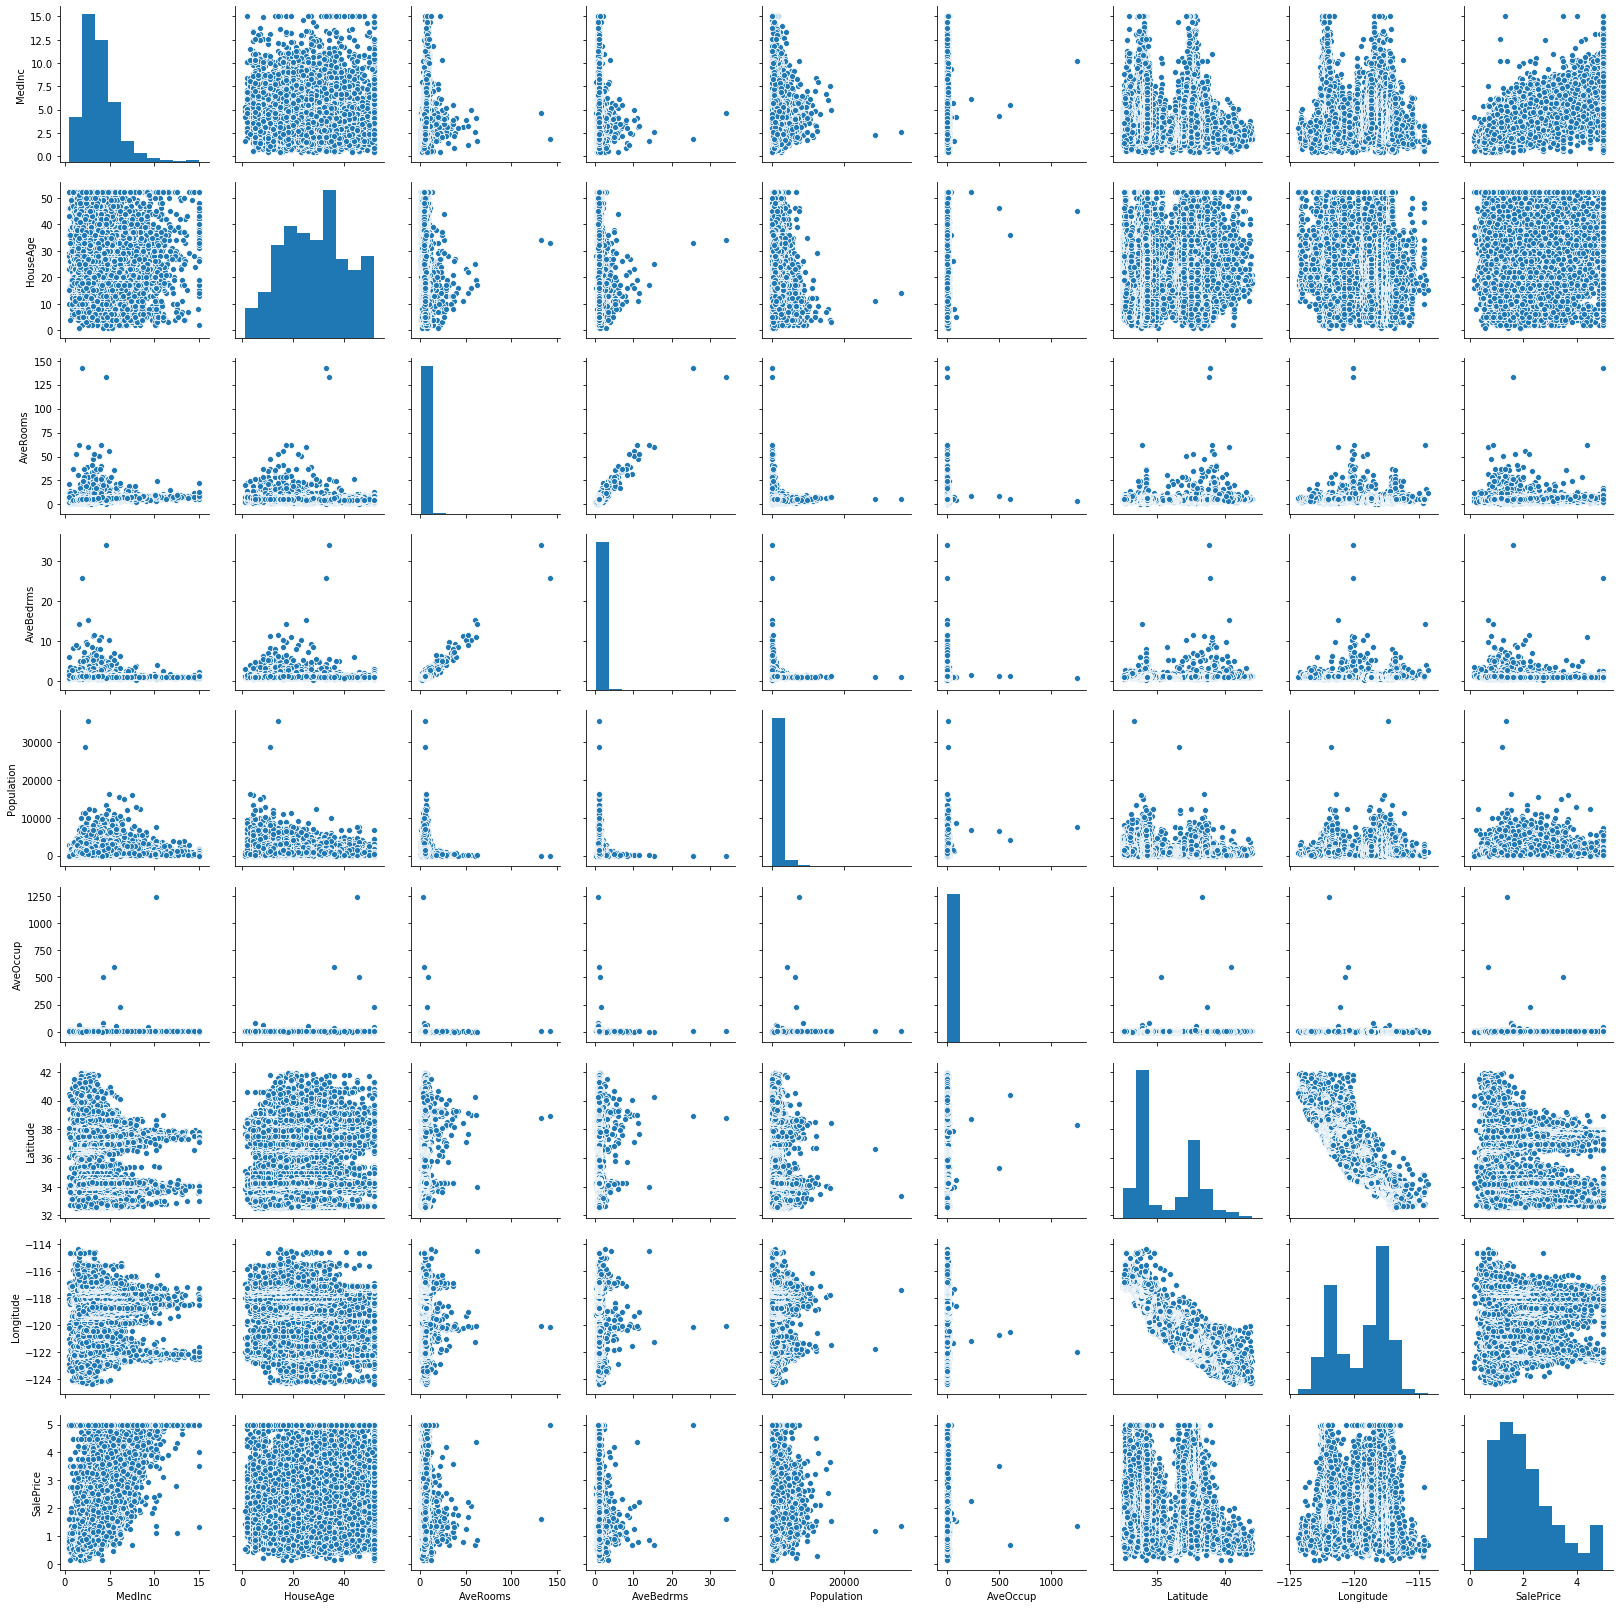

In [12]:
sns.pairplot(raw_data)

Text(0.5, 15.000000000000028, 'Sale Price')

<Figure size 1440x1440 with 0 Axes>

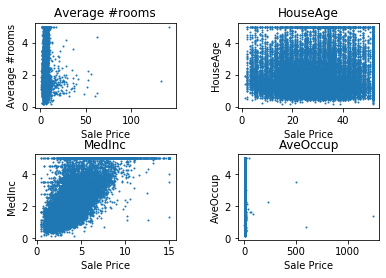

In [13]:
#Did scatter plots because seaborn pairgrid was too confusing
fig=plt.figure(figsize=(20,20))
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2)
fig.tight_layout(pad=2.5)
ax1.set_title('Average #rooms')
ax1.set_ylabel('Average #rooms')
ax1.set_xlabel('Sale Price')
ax1.scatter(data=raw_data, x='AveRooms', y='SalePrice',s=1)

ax2.scatter(data=raw_data, x='HouseAge', y='SalePrice', s=1)
ax2.set_title('HouseAge')
ax2.set_ylabel('HouseAge')
ax2.set_xlabel('Sale Price')
ax3.scatter(data=raw_data, x='MedInc', y='SalePrice', s=1)
ax3.set_title('MedInc')
ax3.set_ylabel('MedInc')
ax3.set_xlabel('Sale Price')
ax4.scatter(data=raw_data, x='AveOccup', y='SalePrice', s=1)
ax4.set_title('AveOccup')
ax4.set_ylabel('AveOccup')
ax4.set_xlabel('Sale Price')


There is a positive correlation between medium income and sale price

We have coordinates, let's see if there are any features correlated with location

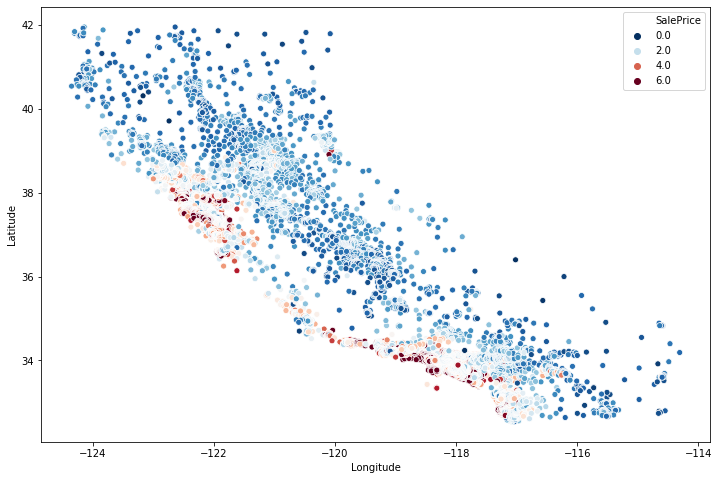

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=raw_data, x='Longitude', y='Latitude', hue='SalePrice', palette='RdBu_r')

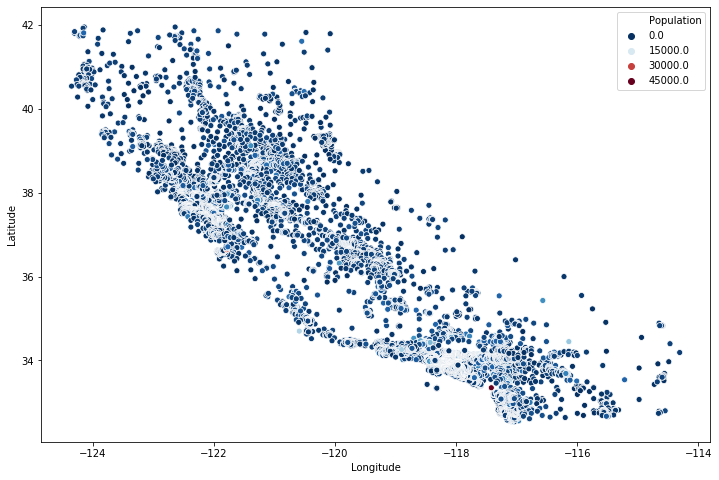

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=raw_data, x='Longitude', y='Latitude', hue='Population', palette='RdBu_r', )

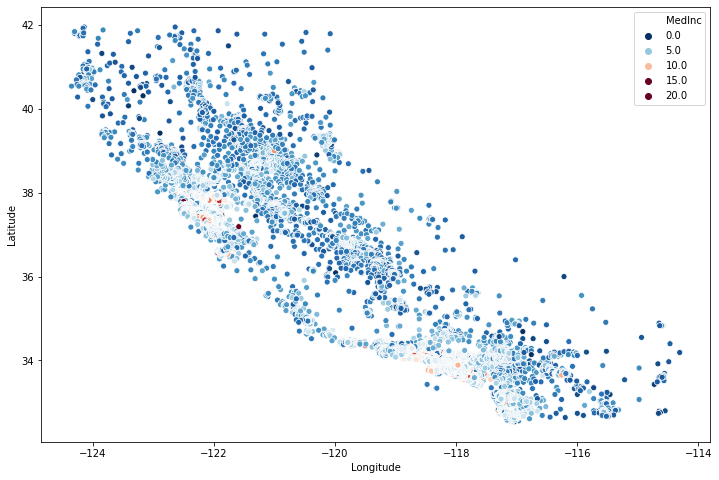

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=raw_data, x='Longitude', y='Latitude', hue='MedInc', palette='RdBu_r')

So... the properties near shore are more expensive and located in regions with higher population and higher medium income

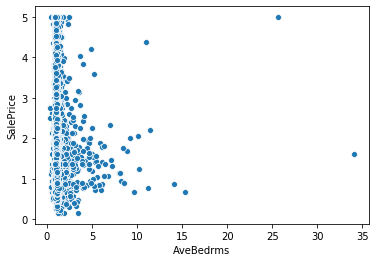

In [17]:
#fig=plt.subplots
sns.scatterplot(x='AveBedrms',y='SalePrice',data=raw_data)

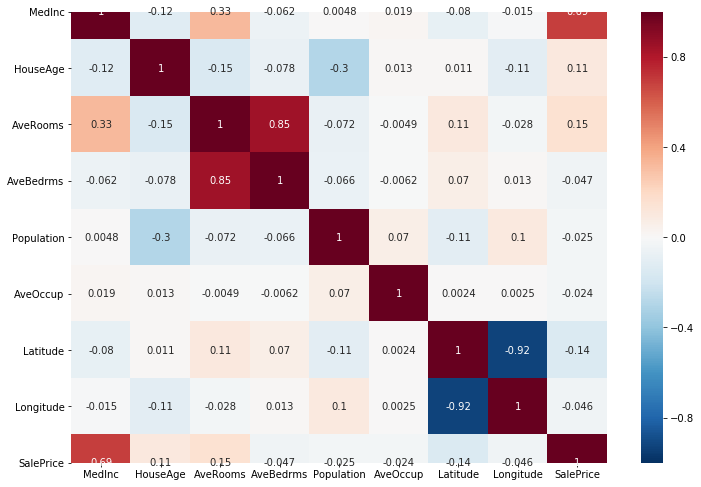

In [18]:
plt.figure(figsize=(12,8.3))
sns.heatmap(raw_data.corr(), annot=True, cmap="RdBu_r", vmin=-1, vmax=1)

#The vertical edges are cutted off due to compatibility problems between matplotlib and seaborn

ok, ok, before the neural network, let's just do a quickie linear regression

So, Average # of rooms and #av.number of bedrooms are clearly redundant. I am going to stick with the average # of bedrooms
I am also going to ditch latitude and longitude, bc they are angular coordinatesand I'm not sure whether they should be mixed... Also latitude and longitude are also highly correlated...

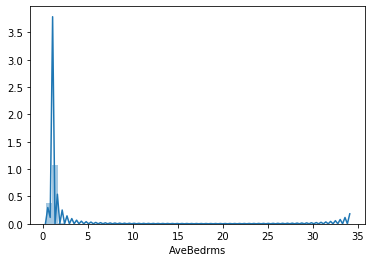

In [19]:
sns.distplot(raw_data['AveBedrms'])

In [20]:
import statsmodels.api as sm
#from sklearn.preprocessing import scale

In [21]:
Y=raw_data['SalePrice']
X=raw_data[['AveBedrms', 'MedInc', 'HouseAge', 'Population', 'AveOccup']]


N=len(X)
p=len(X.columns)+1
X_with_intercept=np.empty(shape=(N,p), dtype=np.float)
X_with_intercept[:,0]=1
X_with_intercept[:,1:p]=X.values
ols=sm.OLS(Y.values,X.values)
ols_result=ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          3.140e+04
Date:                Sat, 07 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:07:49   Log-Likelihood:                         -24870.
No. Observations:               20640   AIC:                                  4.975e+04
Df Residuals:                   20635   BIC:                                  4.979e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0185      0.010     -1.902      0.057      -0.038       0.001
x2             0.4210      0.003    165.642      0.000       0.416       0.426
x3             0.0160      0.000     45.980      0.000       0.015       0.017
x4          1.665e-05    4.6e-06      3.618      0.000    7.63e-06    2.57e-05
x5            -0.0047      0.001     -8.713      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     4262.669   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9935.375
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       5.471   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That 2nd warning is strange  and the coefficients too... should I scale all the variables?

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
scaler.fit_transform(raw_data[['AveBedrms', 'MedInc', 'HouseAge', 'Population', 'AveOccup']])

array([[0.02046866, 0.53966842, 0.78431373, 0.00894083, 0.00149943],
       [0.01892926, 0.53802706, 0.39215686, 0.0672104 , 0.00114074],
       [0.02194011, 0.46602805, 1.        , 0.01381765, 0.00169796],
       ...,
       [0.0233229 , 0.08276438, 0.31372549, 0.0281398 , 0.0013144 ],
       [0.02485928, 0.09429525, 0.33333333, 0.02068444, 0.0011515 ],
       [0.02457305, 0.13025338, 0.29411765, 0.03879032, 0.00154886]])

In [24]:
Y1=raw_data['SalePrice']
X1=pd.DataFrame(scaler.fit_transform(raw_data[['AveBedrms', 'MedInc', 'HouseAge', 'Population', 'AveOccup']]))
N=len(X1)
p=len(X1.columns)+1
X1_with_intercept=np.empty(shape=(N,p), dtype=np.float)
X1_with_intercept[:,0]=1
X1_with_intercept[:,1:p]=X1.values
ols=sm.OLS(Y1.values,X1.values)
ols_result=ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          3.150e+04
Date:                Sat, 07 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:07:50   Log-Likelihood:                         -24838.
No. Observations:               20640   AIC:                                  4.969e+04
Df Residuals:                   20635   BIC:                                  4.973e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4582      0.351      4.156      0.000       0.771       2.146
x2             6.3080      0.037    170.864      0.000       6.236       6.380
x3             0.9657      0.017     57.941      0.000       0.933       0.998
x4             1.3997      0.160      8.771      0.000       1.087       1.712
x5            -5.8324      0.674     -8.657      0.000      -7.153      -4.512
==============================================================================
Omnibus:                     4182.928   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10022.581
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       5.550   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ols_result.pvalues

array([3.24970454e-05, 0.00000000e+00, 0.00000000e+00, 1.91060136e-18,
       5.17396809e-18])

In [26]:
feats=['AveBedrms', 'MedInc', 'HouseAge', 'Population', 'AveOccup']

for n in range(0, len(feats)):
    print ('An increase of a unit in {} leads to a change of {:4.2f} units in SalePrice'.format(feats[n], ols_result.params[n]))


An increase of a unit in AveBedrms leads to a change of 1.46 units in SalePrice
An increase of a unit in MedInc leads to a change of 6.31 units in SalePrice
An increase of a unit in HouseAge leads to a change of 0.97 units in SalePrice
An increase of a unit in Population leads to a change of 1.40 units in SalePrice
An increase of a unit in AveOccup leads to a change of -5.83 units in SalePrice


[(33, 34)]

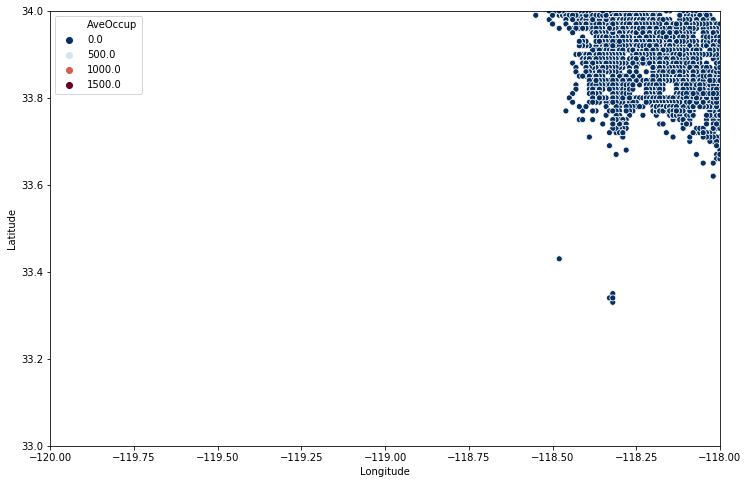

In [27]:
plt.figure(figsize=(12,8))
#g.set_xlim(-120,-118)
#g.set_ylim(30,34)

ax=sns.scatterplot(data=raw_data, x='Longitude', y='Latitude', hue='AveOccup', palette='RdBu_r', )
ax.set(xlim=(-120, -118))
ax.set(ylim=(33, 34))


Let's go the NN part!

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [29]:
model=Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=878)

In [32]:
X_train_scaled=scaler.fit_transform(X_train)

In [33]:
X_test_scaled=scaler.fit_transform(X_test)

In [34]:
X_train_scaled.shape

(13828, 5)

In [35]:
X_test_scaled.shape

(6812, 5)

In [36]:
model.fit(x=X_train.values, y=y_train.values, validation_data=(X_test.values,y_test.values), batch_size=200, epochs=400)

Train on 13828 samples, validate on 6812 samples
Epoch 1/400
13828/13828 [==============================] - 1s 47us/sample - loss: 5.4550 - val_loss: 5.2392
Epoch 2/400
13828/13828 [==============================] - 0s 18us/sample - loss: 4.5569 - val_loss: 3.9160
Epoch 3/400
13828/13828 [==============================] - 0s 15us/sample - loss: 3.1428 - val_loss: 2.3595
Epoch 4/400
13828/13828 [==============================] - 0s 16us/sample - loss: 1.6846 - val_loss: 1.2475
Epoch 5/400
13828/13828 [==============================] - 0s 15us/sample - loss: 1.1517 - val_loss: 1.1023
Epoch 6/400
13828/13828 [==============================] - 0s 15us/sample - loss: 1.0724 - val_loss: 1.0497
Epoch 7/400
13828/13828 [==============================] - 0s 15us/sample - loss: 1.0273 - val_loss: 1.0101
Epoch 8/400
13828/13828 [==============================] - 0s 16us/sample - loss: 0.9868 - val_loss: 0.9728
Epoch 9/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.943

Epoch 76/400
13828/13828 [==============================] - 0s 12us/sample - loss: 0.6245 - val_loss: 0.6461
Epoch 77/400
13828/13828 [==============================] - 0s 11us/sample - loss: 0.6235 - val_loss: 0.6462
Epoch 78/400
13828/13828 [==============================] - 0s 12us/sample - loss: 0.6244 - val_loss: 0.6465
Epoch 79/400
13828/13828 [==============================] - 0s 11us/sample - loss: 0.6245 - val_loss: 0.6462
Epoch 80/400
13828/13828 [==============================] - 0s 11us/sample - loss: 0.6238 - val_loss: 0.6459
Epoch 81/400
13828/13828 [==============================] - 0s 11us/sample - loss: 0.6246 - val_loss: 0.6460
Epoch 82/400
13828/13828 [==============================] - 0s 12us/sample - loss: 0.6238 - val_loss: 0.6472
Epoch 83/400
13828/13828 [==============================] - 0s 12us/sample - loss: 0.6238 - val_loss: 0.6459
Epoch 84/400
13828/13828 [==============================] - 0s 11us/sample - loss: 0.6236 - val_loss: 0.6460
Epoch 85/400
13828/

13828/13828 [==============================] - 0s 15us/sample - loss: 0.6231 - val_loss: 0.6488
Epoch 151/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6224 - val_loss: 0.6465
Epoch 152/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6221 - val_loss: 0.6481
Epoch 153/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6231 - val_loss: 0.6464
Epoch 154/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6231 - val_loss: 0.6583
Epoch 155/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6233 - val_loss: 0.6478
Epoch 156/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6225 - val_loss: 0.6477
Epoch 157/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6223 - val_loss: 0.6473
Epoch 158/400
13828/13828 [==============================] - 0s 17us/sample - loss: 0.6220 - val_loss: 0.6470
Epoch 159/400
13828/1382

13828/13828 [==============================] - 0s 16us/sample - loss: 0.6230 - val_loss: 0.6469
Epoch 225/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6222 - val_loss: 0.6468
Epoch 226/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6222 - val_loss: 0.6466
Epoch 227/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6236 - val_loss: 0.6517
Epoch 228/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6234 - val_loss: 0.6468
Epoch 229/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6227 - val_loss: 0.6482
Epoch 230/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6222 - val_loss: 0.6468
Epoch 231/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6225 - val_loss: 0.6467
Epoch 232/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6231 - val_loss: 0.6494
Epoch 233/400
13828/1382

13828/13828 [==============================] - 0s 16us/sample - loss: 0.6186 - val_loss: 0.6417
Epoch 299/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6185 - val_loss: 0.6417
Epoch 300/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6176 - val_loss: 0.6401
Epoch 301/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6172 - val_loss: 0.6397
Epoch 302/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6175 - val_loss: 0.6417
Epoch 303/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6165 - val_loss: 0.6399
Epoch 304/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6161 - val_loss: 0.6388
Epoch 305/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6155 - val_loss: 0.6372
Epoch 306/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6150 - val_loss: 0.6367
Epoch 307/400
13828/1382

13828/13828 [==============================] - 0s 16us/sample - loss: 0.6044 - val_loss: 0.6196
Epoch 373/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6041 - val_loss: 0.6179
Epoch 374/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6041 - val_loss: 0.6184
Epoch 375/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6046 - val_loss: 0.6171
Epoch 376/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6037 - val_loss: 0.6175
Epoch 377/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6035 - val_loss: 0.6169
Epoch 378/400
13828/13828 [==============================] - 0s 14us/sample - loss: 0.6039 - val_loss: 0.6167
Epoch 379/400
13828/13828 [==============================] - 0s 13us/sample - loss: 0.6033 - val_loss: 0.6179
Epoch 380/400
13828/13828 [==============================] - 0s 15us/sample - loss: 0.6037 - val_loss: 0.6160
Epoch 381/400
13828/1382

In [41]:
losses=pd.DataFrame(model.history.history)

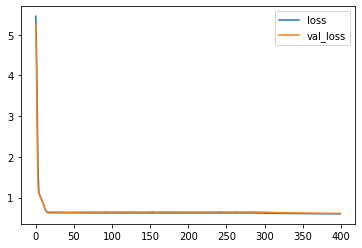

In [42]:
losses.plot()

The losses on the training (loss) and cross-validation data decrease (val_loss)

In [51]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [45]:
X_test

,0,1,2,3,4
9927,0.020492,0.233080,0.607843,0.032764,0.001553
15963,0.023553,0.238397,1.000000,0.051711,0.002281
5510,0.016248,0.247541,0.725490,0.016705,0.001928
10162,0.019445,0.396939,0.470588,0.044424,0.002185
13624,0.024277,0.062620,0.568627,0.042210,0.001942
...,...,...,...,...,...
1241,0.022593,0.157529,0.921569,0.018330,0.002100
13381,0.020708,0.289637,0.313725,0.110737,0.002184
4686,0.021404,0.197204,0.862745,0.094061,0.000767
20461,0.022474,0.393512,0.411765,0.046582,0.002166


In [46]:
predictions=model.predict(X_test)

In [48]:
#Get RMSE
np.sqrt(mean_squared_error(y_test, predictions))

0.7844036873629628

In [49]:
mean_squared_error(y_test, predictions)

0.6152891447486127

In [50]:
explained_variance_score(y_test, predictions)

0.5384889096714887

In [52]:
r2_score(y_test, predictions)

0.5361038842954369

Not very good scores... 

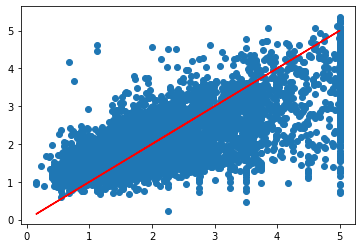

In [55]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [64]:
#errors= y
errors=y_test.values.reshape(len(y_test),1)-predictions


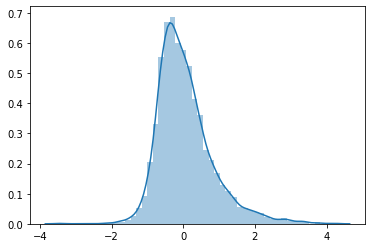

In [65]:
sns.distplot(errors)